<a href="https://colab.research.google.com/github/DiyorAI/air-price-prediction/blob/main/Linear_models_development_for_air_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import linear_model
import copy

In [ ]:
df = pd.read_csv('/content/train_data.csv (3) (1) (1).zip')
df.head()

In [ ]:
encoder = OrdinalEncoder()
text = df[['airline', 'flight','source_city','departure_time','stops','arrival_time','destination_city','class']]
df[['airline', 'flight','source_city','departure_time','stops','arrival_time','destination_city','class']]=encoder.fit_transform(text)

NameError: ignored

In [ ]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


In [ ]:
drop = ['id', 'price']
x = df.drop(drop, axis=1)
y = df['price']

x = x.sample(100)
y = y.sample(100)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=2)

print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (60, 10)
x_test = (40, 10)
y_train = (60,)
y_test = (40,)


In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
def predict(x, w, b):
  m = x.shape[0]
  f_wb = np.zeros(m)
  for i in range(m):
    f_wb[i] = np.dot(x[i], w) + b
  return f_wb

In [ ]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  cost = 0
  for i in range(m):
    f_wb = np.dot(x[i], w)+ b
    cost = cost + ((y[i] - f_wb)** 2)
  total_cost = 1 / (2 * m) * cost
  return total_cost

In [ ]:
def compute_gradient(x, y, w, b):
  m,n = x.shape
  dj_dw = np.zeros(n)
  dj_db = 0
  for i in range(m):
    f_wb = np.dot(x[i], w)+b
    err = f_wb - y[i]

    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * x[i, j]
    dj_db = dj_db + err

  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw, dj_db


In [ ]:
def compute_gradient_descent(x, y, w_in, b_in, alpha, iter, cost, gradient):
  J_hist = []
  p_hist = []
  w = copy.deepcopy(w_in)
  b = b_in
  for i in range(iter):
    dj_dw, dj_db = gradient(x, y, w, b)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i < 100000:
      J_hist.append(cost(x, y, w, b))
      p_hist.append(np.array([w, b]))

  return J_hist, p_hist, w, b

In [ ]:
m,n = x_train.shape


w_in = np.array([1 ,1, 1, 1, 1, 1, 1, 1, 1, 1])
b_in = 1
alpha = 0.000001
iter_n = 10000

In [ ]:
J_hist, p_hist, w, b, = compute_gradient_descent(x_train, y_train, w_in, b_in, alpha, iter_n, compute_cost,compute_gradient)

<ipython-input-66-662fd2a23f3b>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_hist.append(np.array([w, b]))


In [ ]:
f_wb = predict(x_test,w_in, b_in)
predictions = pd.DataFrame({'predicted vaue':f_wb, 'real value':y_test})

In [ ]:
ms_error = compute_cost(x_test, y_test, w_in, b_in)
print(np.sqrt(ms_error))

21510.54876463241


In [ ]:
def z_score_norm(X):
  m = np.mean(X, axis=0)
  s = np.std(X, axis=0)
  x_nor = (X - m) / s
  return x_nor

In [ ]:
x_train_scaled = z_score_norm(x_train)
x_test_scaled = z_score_norm(x_test)

In [ ]:
J_hist, p_hist, w, b, = compute_gradient_descent(x_train_scaled, y_train, w_in, b_in, alpha, iter_n, compute_cost,compute_gradient)

<ipython-input-66-662fd2a23f3b>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_hist.append(np.array([w, b]))


In [ ]:
ms_error = compute_cost(x_test, y_test, w_in, b_in)
print(np.sqrt(ms_error))

21510.54876463241


In [ ]:
def max_norm(x):
  max = np.max(x, axis=0)
  x_nor = x / max
  return x_nor

In [ ]:
x_train_scaled = max_norm(x_train)
x_test_scaled = max_norm(x_test)

In [ ]:
J_hist, p_hist, w, b, = compute_gradient_descent(x_train_scaled, y_train, w_in, b_in, alpha, iter_n, compute_cost,compute_gradient)

<ipython-input-66-662fd2a23f3b>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_hist.append(np.array([w, b]))


In [ ]:
ms_error = compute_cost(x_test, y_test, w_in, b_in)
print(np.sqrt(ms_error))

21510.54876463241


In [ ]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


In [ ]:
drop = ['id', 'price']

x = df.drop(drop, axis=1)
y = df[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=1)

print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (12000, 10)
x_test = (8000, 10)
y_train = (12000, 1)
y_test = (8000, 1)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_hat = model.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

6838.0613563405705


In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
model = LinearRegression()

model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
y_hat = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_hat)
print(np.sqrt(mse))

6846.163556619122


In [ ]:
poly = PolynomialFeatures(degree=6, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)
x_test_mapped = poly.fit_transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(x_train_mapped, y_train)

LinearRegression()

In [ ]:
y_hat_train = model.predict(x_train_mapped)
mse_train = mean_squared_error(y_train , y_hat_train)
print(f'train mse {np.sqrt(mse_train)}')
y_hat_test = model.predict(x_test_mapped)
mse_test = mean_squared_error(y_test, y_hat_test)
print(f'test mse = {np.sqrt(mse_test)}')

train mse 3905.266239729369
test mse = 5558.284621435551


In [ ]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


In [ ]:
df['waiting_time'] = (df['days_left']*24)-df['duration']
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,waiting_time
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212,489.75
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292,166.25
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553,110.42
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760,665.25
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712,94.00


In [ ]:
drop = ['id', 'price']

x = df.drop(drop, axis=1)
y = df[['price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=1)

print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (12000, 11)
x_test = (8000, 11)
y_train = (12000, 1)
y_test = (8000, 1)


In [ ]:
poly = PolynomialFeatures(degree=4, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)
x_test_mapped = poly.fit_transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(x_train_mapped, y_train)

LinearRegression()

In [ ]:
y_hat_train = model.predict(x_train_mapped)
mse_train = mean_squared_error(y_train , y_hat_train)
print(f'train mse {np.sqrt(mse_train)}')
y_hat_test = model.predict(x_test_mapped)
mse_test = mean_squared_error(y_test, y_hat_test)
print(f'test mse = {np.sqrt(mse_test)}')

train mse 4488.799447857171
test mse = 4885.468599898672


In [ ]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,waiting_time
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212,489.75
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292,166.25
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553,110.42
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760,665.25
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712,94.00


In [ ]:
drop_col = ['id', 'price']

x = df.drop(drop_col, axis=1)
y = df[['price']]

x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=.50, random_state=1)

print(f'x_train ={x_train.shape}')
print(f'x_cv = {x_cv.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_cv = {y_cv.shape}')
print(f'y_test = {y_test.shape}')

x_train =(12000, 11)
x_cv = (4000, 11)
x_test = (4000, 11)
y_train = (12000, 1)
y_cv = (4000, 1)
y_test = (4000, 1)


In [ ]:
train_err = []
cv_err = []
degrees = np.array([1, 2, 3, 4, 5])

for i in range(1, 6):
  poly = PolynomialFeatures(degree= i, include_bias=False)
  x_train_mapped = poly.fit_transform(x_train)

  model = LinearRegression()
  model.fit(x_train_mapped, y_train)

  train_yhat = model.predict(x_train_mapped)
  train_mse = np.sqrt(mean_squared_error(y_train, train_yhat))
  train_err.append(train_mse)

  x_cv_mapped = poly.fit_transform(x_cv)

  cv_yhat = model.predict(x_cv_mapped)
  cv_mse = np.sqrt(mean_squared_error(y_cv, cv_yhat))
  cv_err.append(cv_mse)

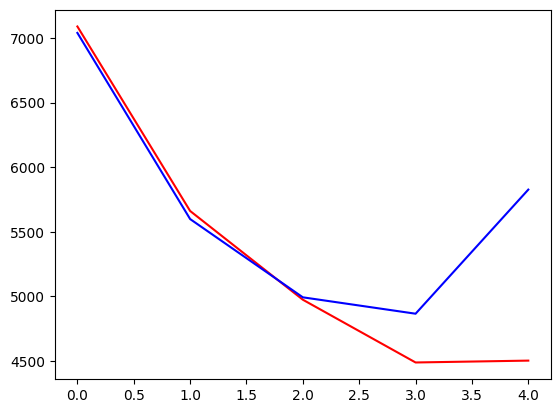

In [ ]:
plt.plot(train_err, color='red', label='train')
plt.plot(cv_err, color='blue', label='test')

plt.show()

In [ ]:
print(train_err)
print(cv_err)

print(np.min(cv_err))

[7089.866973113993, 5661.664927231925, 4974.633875453406, 4488.799447857171, 4503.197202040545]
[7040.188534913974, 5599.122623749118, 4993.203651260235, 4866.316826037737, 5827.016992561736]
4866.316826037737


In [ ]:
train_err = []
cv_err = []
lambdas = np.array([ 1e-4,1e-3,1e-2, 1e-1,1,10,100, 200, 500])

for i in lambdas:
  poly = PolynomialFeatures(degree= 4, include_bias=False)
  x_train_mapped = poly.fit_transform(x_train)

  model = linear_model.Ridge(alpha = i)
  model.fit(x_train_mapped, y_train)

  tr_yhat = model.predict(x_train_mapped)
  tr_mse = np.sqrt(mean_squared_error(y_train, tr_yhat))
  train_err.append(tr_mse)

  x_cv_mapped = poly.fit_transform(x_cv)

  cv_yhat = model.predict(x_cv_mapped)
  cv_mse = np.sqrt(mean_squared_error(y_cv, cv_yhat))
  cv_err.append(cv_mse)

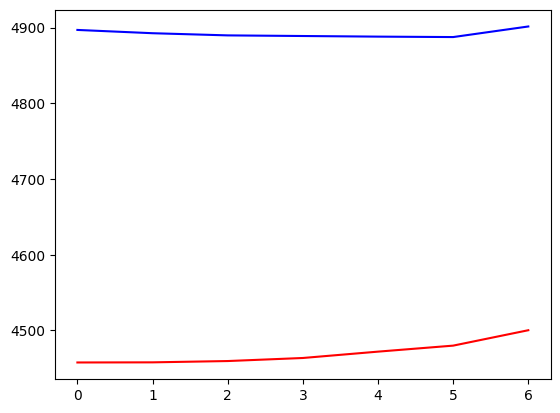

In [ ]:
plt.plot(train_err, color='red', label='train')
plt.plot(cv_err, color='blue', label='test')
plt.show()

In [ ]:
print(f'train error max {np.max(train_err)}')
print(f'train error min{np.min(train_err)}')
print(f'test error max {np.max(cv_err)}')
print(f'test error min {np.min(cv_err)}')

train error max 4554.269971956699
train error min4483.317334417957
test error max 4873.154139120767
test error min 4804.525558040686


perfect model for this preblom in linear models

In [ ]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,waiting_time
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212,489.75
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292,166.25
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553,110.42
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760,665.25
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712,94.00


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=1)

In [ ]:
poly = PolynomialFeatures(degree=4, include_bias=False)

x_train_mapped = poly.fit_transform(x_train)
x_test_mapped = poly.fit_transform(x_test)

model = LinearRegression()
model.fit(x_train_mapped, y_train)

LinearRegression()

In [ ]:
yhat = model.predict(x_test_mapped)
mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)

print(f"mean absolute error {mae}")
print(f'mean squared error {np.sqrt(mse)}')

mean absolute error 3047.98004862043
mean squared error 4885.468599898672
